# Extração de características

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.shape

(141530, 85)

In [4]:
df.columns = [i.lower().strip().replace(' ', '_') for i in df.columns]

In [5]:
mantem = [
    'bwd_packet_length_mean',
    'bwd_packet_length_std',
    'bwd_packet_length_min',
    'bwd_packet_length_max',
    'fwd_packet_length_mean',
    'fwd_packet_length_std',
    'fwd_packet_length_min',
    'fwd_packet_length_max',
    'bwd_iat_max',
    'bwd_iat_total',
    'fwd_iat_mean',
    'fwd_iat_std',
    'fwd_iat_max',
    'fwd_iat_total',
    'fwd_psh_flags',
    'bwd_header_length',
    'fwd_header_length',
    'bwd_segment_size_avg',
    'fwd_segment_size_avg',
    'bwd_packet/bulk_avg',
    'bwd_init_win_bytes',
    'fwd_init_win_bytes',
    'fwd_act_data_pkts',
    'idle_mean',
    'idle_min',
    'idle_max',
    'packet_length_mean',
    'packet_length_std',
    'packet_length_min',
    'packet_length_max',
    'flow_duration',
    'flow_iat_mean',
    'flow_iat_std',
    'flow_iat_max',
    'subflow_fwd_packets',
    'subflow_fwd_bytes',
    'subflow_bwd_bytes',
    'total_fwd_packet',
    'total_bwd_packets',
    'protocol',
    'fin_flag_count',
    'syn_flag_count',
    'psh_flag_count',
    'ack_flag_count',
    'average_packet_size',
    'label'
]

In [6]:
df_velho = df

In [7]:
df_velho.columns[df_velho.isna().any()]

Index(['flow_bytes/s'], dtype='object')

In [8]:
df = df_velho[mantem].copy()

In [9]:
df.shape

(141530, 46)

In [10]:
pd.set_option('display.max_columns', None)
df.describe()

,bwd_packet_length_mean,bwd_packet_length_std,bwd_packet_length_min,bwd_packet_length_max,fwd_packet_length_mean,fwd_packet_length_std,fwd_packet_length_min,fwd_packet_length_max,bwd_iat_max,bwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_total,fwd_psh_flags,bwd_header_length,fwd_header_length,bwd_segment_size_avg,fwd_segment_size_avg,bwd_packet/bulk_avg,bwd_init_win_bytes,fwd_init_win_bytes,fwd_act_data_pkts,idle_mean,idle_min,idle_max,packet_length_mean,packet_length_std,packet_length_min,packet_length_max,flow_duration,flow_iat_mean,flow_iat_std,flow_iat_max,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_bytes,total_fwd_packet,total_bwd_packets,protocol,fin_flag_count,syn_flag_count,psh_flag_count,ack_flag_count,average_packet_size
count,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,1.415300e+05,1.415300e+05,1.415300e+05,1.415300e+05,1.415300e+05,1.415300e+05,141530.000000,1.415300e+05,1.415300e+05,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,1.415300e+05,1.415300e+05,1.415300e+05,141530.000000,141530.000000,141530.000000,141530.000000,1.415300e+05,1.415300e+05,1.415300e+05,1.415300e+05,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000
mean,107.286657,65.183434,41.252194,229.971299,69.594959,63.974203,15.617078,208.920420,7.408141e+06,1.663278e+07,4.101510e+06,2.590150e+06,9.198071e+06,1.976846e+07,0.099562,3.099272e+03,2.933009e+03,107.286657,69.594959,158.869455,1766.762411,5308.189670,96.881573,7.028030e+14,5.994078e+14,7.305885e+14,94.373958,108.474093,14.365604,323.627316,2.081280e+07,2.604871e+06,3.217701e+06,9.893961e+06,0.286745,43.128022,55.488568,152.800749,154.642062,10.350427,0.455691,0.462284,61.523168,268.251749,108.900008
std,240.511916,193.995126,100.785013,786.736861,219.965954,168.646012,31.312298,649.432333,1.801633e+07,3.590770e+07,1.145549e+07,7.138834e+06,1.921286e+07,3.765663e+07,0.299416,6.995175e+04,4.752686e+04,240.511916,219.965954,3042.371342,7563.995687,9895.622577,1582.814902,7.058710e+14,7.138287e+14,7.248202e+14,190.563975,207.640840,23.951595,966.025271,3.809155e+07,7.124917e+06,7.753864e+06,1.968518e+07,0.452243,137.725733,134.367698,2378.323352,3418.715287,5.431807,0.556133,0.844423,807.239077,5342.816116,197.306424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.778100e+04,3.021500e+03,0.000000e+00,1.690825e+04,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,22.666667,0.000000,0.000000,34.000000,0.000000e+00,0.000000e+00,6.889431e+04,0.000000e+00,1.932950e+05,2.476785e+05,0.000000,1.600000e+01,4.000000e+01,0.000000,22.666667,0.000000,0.000000,913.000000,1.000000,7.281250e+14,5.584614e+06,1.427730e+15,28.363636,9.237604,0.000000,59.000000,4.162820e+05,2.071620e+05,1.297621e+04,4.114095e+05,0.000000,18.000000,0.000000,2.000000,1.000000,6.000000,0.000000,0.000000,0.000000,2.000000,33.000000
75%,96.969207,11.313709,0.000000,213.000000,45.000000,39.259818,31.000000,103.000000,7.335540e+05,1.321916e+06,2.682830e+06,1.436683e+06,6.323130e+06,9.743915e+06,0.0000

## Remover colunas correlacionadas

In [11]:
# https://stackoverflow.com/a/44674459
def correlation(ds, threshold):
    dataset = ds.copy()
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
    return dataset

In [12]:
df_sem_correlacoes = correlation(df, 0.75)

In [13]:
print('Colunas a manter:', len(df_sem_correlacoes.columns))
df_sem_correlacoes.columns

Colunas a manter: 25


Index(['bwd_packet_length_mean', 'bwd_packet_length_std',
       'bwd_packet_length_min', 'fwd_packet_length_mean',
       'fwd_packet_length_std', 'fwd_packet_length_min', 'bwd_iat_max',
       'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_total', 'fwd_psh_flags',
       'bwd_header_length', 'bwd_init_win_bytes', 'fwd_init_win_bytes',
       'fwd_act_data_pkts', 'idle_mean', 'packet_length_mean',
       'packet_length_max', 'subflow_fwd_packets', 'total_fwd_packet',
       'protocol', 'fin_flag_count', 'syn_flag_count', 'psh_flag_count',
       'label'],
      dtype='object')

In [14]:
print('Colunas a remover')
set(df.columns) - set(df_sem_correlacoes.columns)

Colunas a remover


{'ack_flag_count',
 'average_packet_size',
 'bwd_iat_total',
 'bwd_packet/bulk_avg',
 'bwd_packet_length_max',
 'bwd_segment_size_avg',
 'flow_duration',
 'flow_iat_max',
 'flow_iat_mean',
 'flow_iat_std',
 'fwd_header_length',
 'fwd_iat_max',
 'fwd_packet_length_max',
 'fwd_segment_size_avg',
 'idle_max',
 'idle_min',
 'packet_length_min',
 'packet_length_std',
 'subflow_bwd_bytes',
 'subflow_fwd_bytes',
 'total_bwd_packets'}

In [15]:
mantem = df_sem_correlacoes.columns
df_ml = df[mantem].copy()

In [17]:
from sklearn.utils import shuffle

df_shuffle = shuffle(df_ml, random_state=21).reset_index(drop=True)

int_80 = int(df_shuffle.shape[0] * 0.8)

df_80 = df_shuffle.loc[:int_80, :]
df_20 = df_shuffle.loc[int_80:, :]

In [18]:
def adiciona_anotacao(axis):
    for rect in axis.patches:
        height = round(rect.get_height(), 3)
        axis.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

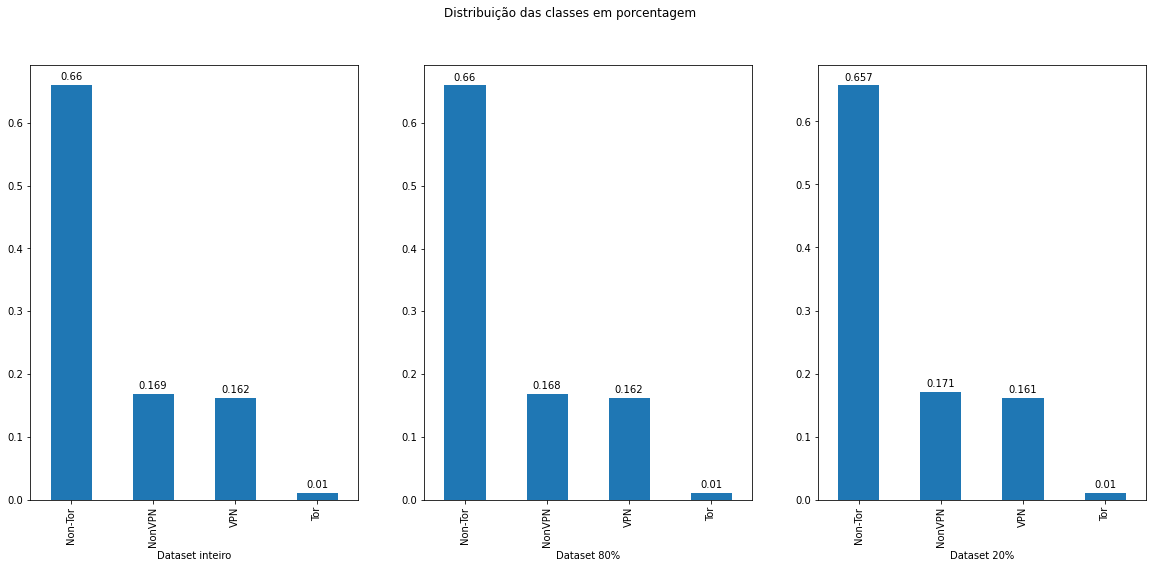

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(20,8))
ax = df_shuffle['label'].value_counts(normalize=True).plot.bar(ax=axs[0])
adiciona_anotacao(ax)
ax.set_xlabel('Dataset inteiro')

ax1 = df_80['label'].value_counts(normalize=True).plot.bar(ax=axs[1])
adiciona_anotacao(ax1)
ax1.set_xlabel('Dataset 80%')

ax2 =df_20['label'].value_counts(normalize=True).plot.bar(ax=axs[2])
adiciona_anotacao(ax2)
ax2.set_xlabel('Dataset 20%')

plt.suptitle('Distribuição das classes em porcentagem')
plt.show()